In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from skimage.morphology import binary_erosion
from scipy.ndimage import distance_transform_edt

In [37]:
# generate toy mask
N = 128
m = np.zeros((N, N), dtype=int)

# Define parameters for the ellipses (center, semi-axes, and orientation)
ellipses = [
    (30, 40, 20, 20, np.deg2rad(30)),  # (row, col, semi-major, semi-minor, rotation)
    (20, 80, 10, 20, np.deg2rad(75)),
    (90, 60, 30, 40, np.deg2rad(15)),
]

# Draw each ellipse on the mask
for (r, c, r_radius, c_radius, angle) in ellipses:
    rr, cc = ellipse(r, c, r_radius, c_radius, rotation=angle, shape=m.shape)
    m[rr, cc] = 1

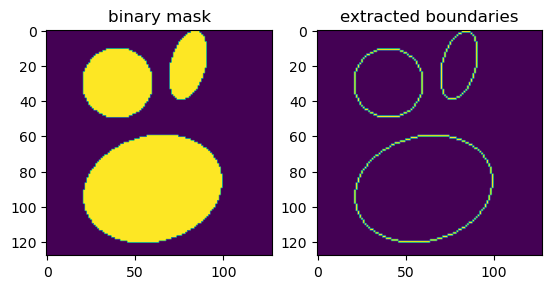

In [38]:
# extract boundaries
m_bd = np.abs(binary_erosion(m) - m)

fig, ax = plt.subplots(1,2)
ax[0].imshow(m), ax[0].set_title('binary mask')
ax[1].imshow(m_bd), ax[1].set_title('extracted boundaries')
plt.show()

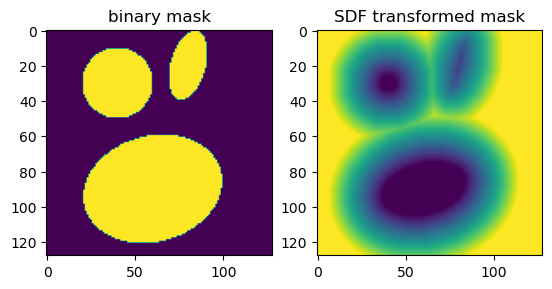

In [55]:
# extract signed distance function (SDF)
distance = distance_transform_edt(np.where(m_bd==0., np.ones_like(m_bd), np.zeros_like(m_bd)))
m_sdf = np.where(m == 1, distance*-1, distance) # ensure signed DT

# truncate at threshold and normalize between [-1,1]
thresh = 15
m_sdf[m_sdf >= thresh] = thresh
m_sdf[m_sdf <= -thresh] = -thresh
m_sdf /= thresh

fig, ax = plt.subplots(1,2)
ax[0].imshow(m), ax[0].set_title('binary mask')
ax[1].imshow(m_sdf), ax[1].set_title('SDF transformed mask')
plt.show()

In [56]:
# check SDF normalization
print('SDF mask values living in [%i,%i]' %(m_sdf.min(),m_sdf.max()))

SDF mask values living in [-1,1]


In [57]:
# retrieve binary mask from SDF mask by thresholding 
m_retrieved = np.where(m_sdf <= 0, np.ones_like(m_sdf), np.zeros_like(m_sdf))
print('Retrieved mask from thresholding SDF agrees with original binary mask: %s' %np.allclose(m_retrieved,m)) 

Retrieved mask from thresholding SDF agrees with original binary mask: True
